In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

In [2]:
# Definir variáveis
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/'
img_size = 150
batch_size = 32

In [3]:
# Carregar as imagens de treino, validação e teste
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(img_size,img_size), batch_size=batch_size, class_mode='binary')
val_data = val_datagen.flow_from_directory(val_dir, target_size=(img_size,img_size), batch_size=batch_size, class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(img_size,img_size), batch_size=batch_size, class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
# Definir a arquitetura do modelo
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_size,img_size,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# Compilar e treinar o modelo
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['acc'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

history = model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[learning_rate_reduction])

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
163/163 [==============================] - 89s 542ms/step - loss: 0.1961 - acc: 0.9325 - val_loss: 0.5668 - val_acc: 0.6250 - lr: 1.0000e-04
Epoch 2/10
163/163 [==============================] - 88s 537ms/step - loss: 0.1494 - acc: 0.9457 - val_loss: 0.9837 - val_acc: 0.5625 - lr: 1.0000e-04
Epoch 3/10
163/163 [==============================] - ETA: 0s - loss: 0.1460 - acc: 0.9427
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
163/163 [==============================] - 88s 540ms/step - loss: 0.1460 - acc: 0.9427 - val_loss: 1.1641 - val_acc: 0.5625 - lr: 1.0000e-04
Epoch 4/10
163/163 [==============================] - 88s 538ms/step - loss: 0.1226 - acc: 0.9549 - val_loss: 1.4380 - val_acc: 0.5625 - lr: 5.0000e-05
Epoch 5/10
163/163 [==============================] - ETA: 0s - loss: 0.1146 - acc: 0.9588
Epoch 5: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
163/163 [==============================] - 88s 538ms/step - loss: 0.1

In [11]:
# Avaliar o desempenho do modelo
score = model.evaluate(test_data)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])


20/20 [==============================] - 7s 346ms/step - loss: 0.3674 - acc: 0.8990
Test Loss: 0.36736977100372314
Test Accuracy: 0.8990384340286255


20/20 [==============================] - 7s 357ms/step


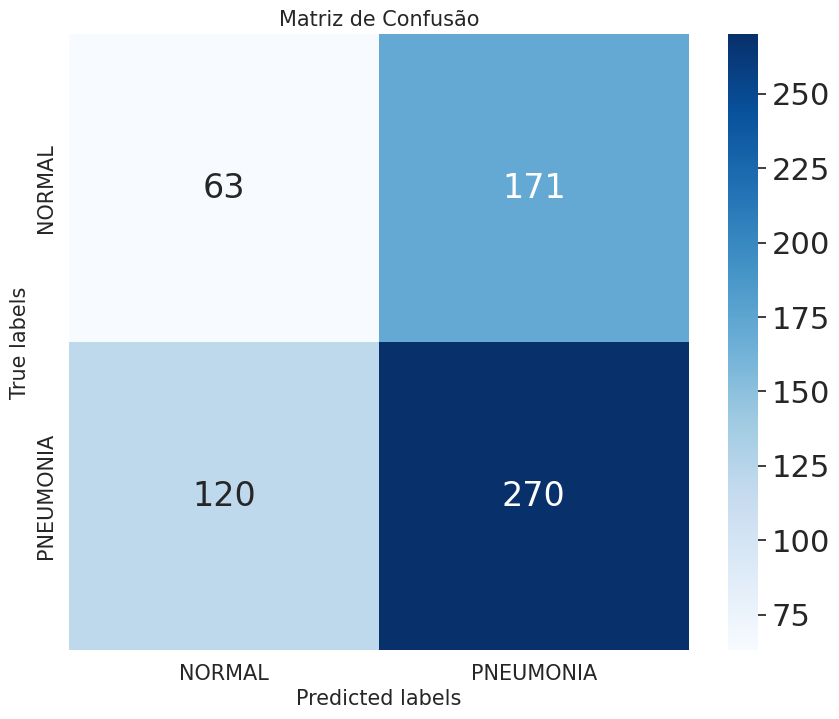

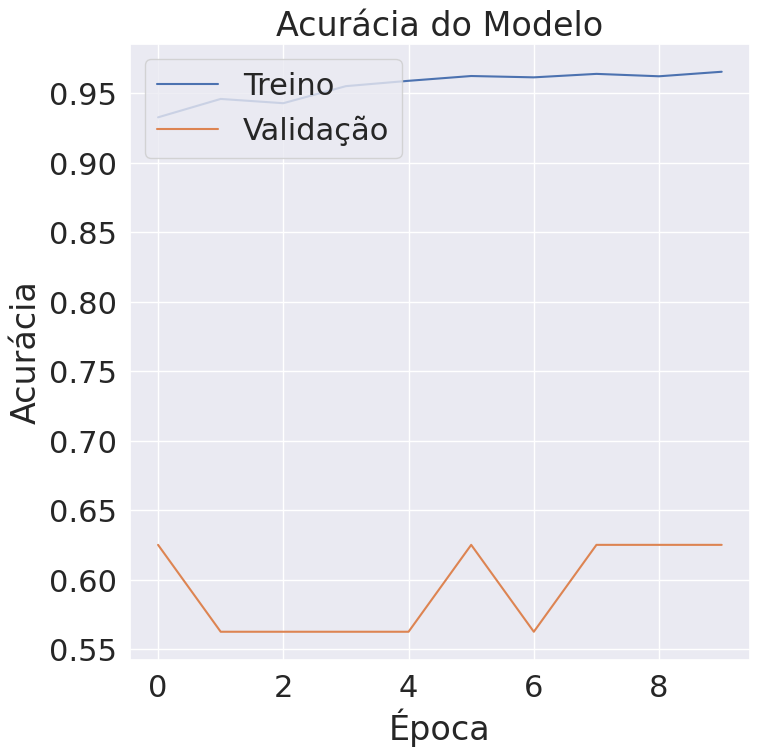

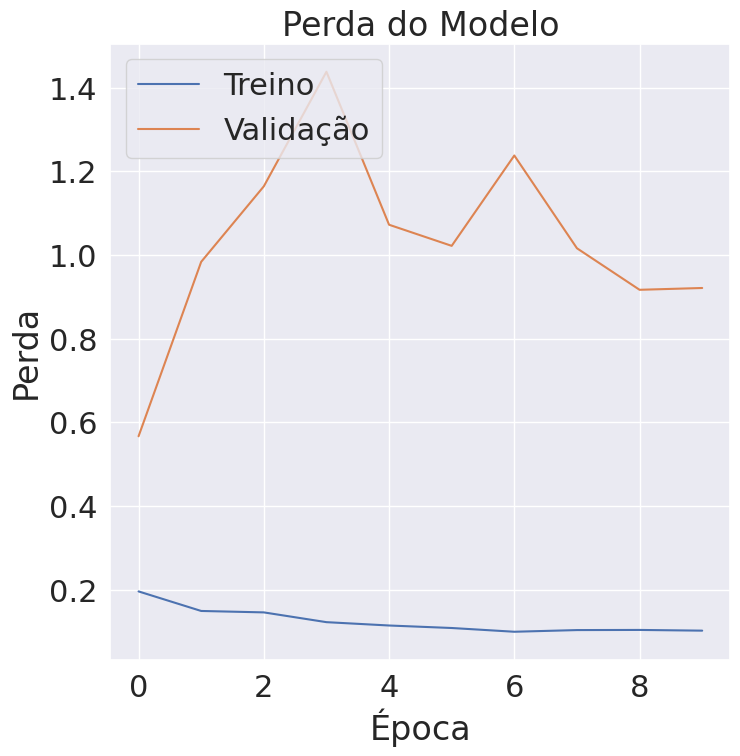

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

# Fazer as previsões para os dados de teste
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).flatten()

# Calcular a matriz de confusão
cm = confusion_matrix(test_data.classes, y_pred)

# Plotar a matriz de confusão com seaborn
plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('True labels', fontsize=15)
ax.set_title('Matriz de Confusão', fontsize=15)
ax.xaxis.set_ticklabels(['NORMAL', 'PNEUMONIA'], fontsize=15)
ax.yaxis.set_ticklabels(['NORMAL', 'PNEUMONIA'], fontsize=15)
plt.show()

# Plotar o gráfico de acurácia
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

# Plotar o gráfico de perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()


In [14]:
# salvar o modelo treinado em um arquivo h5
model.save('modelo_pneumonia1.h5')

In [9]:
import tensorflow as tf
print("GPU available: ", tf.test.is_gpu_available())



GPU available:  True
